## Fourier Transform Exploration

<img src="fft.png">

#### The fourier series is simply:

f(t) = a0 + a1*cos(t) + a2*cos(2t) + ... an*cos(nt) + ... b1*sin(t) + b2*sin(2t) + ... bn*sin(nt)

## Integral Reviews

In [156]:
%matplotlib inline
import numpy as np
import scipy.integrate as integrate
import scipy
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def my_integral(fx,a,b):
    t = np.arange(a, b, 0.01)
    plt.plot(t, fx(t), 'b')
    plt.plot([0, a], [0, b], 'r', lw=2)
    plt.ylim((-1.5, 1.5))
    plt.axhline(y=0,color = 'r')
    plt.show()
    integ = round(integrate.quad(fx, a,b)[0],8)
    print "The integral is {}".format(str(integ))

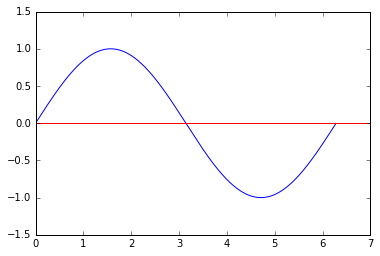

The integral is 0.0


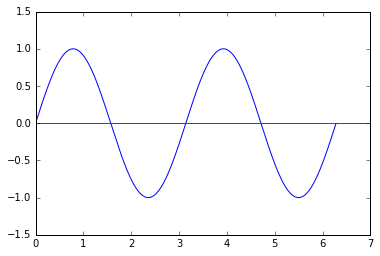

The integral is -0.0


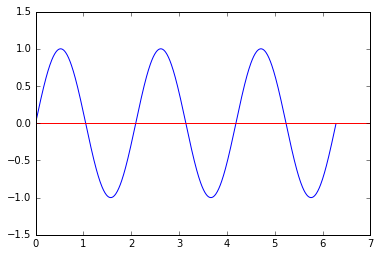

The integral is 0.0


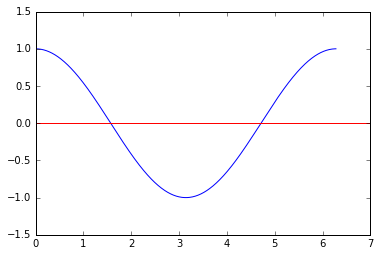

The integral is 0.0


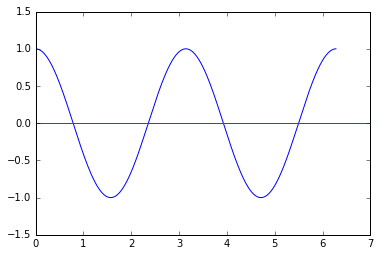

The integral is -0.0


In [3]:
for m in range(1,4):
    fx = lambda x: np.sin(m*x)
    my_integral(fx, 0, np.pi*2)
for m in range(1,3):
    fx = lambda x: np.cos(m*x)
    my_integral(fx, 0, np.pi*2)    

#### Note that the integral is zero for any m where m is an integer greater than 0.

## Solve for the first coefficient a0
#### Method
1. Integrate both sides from 0 to 2pi
2. All of the trailing terms cancel as zero (see above)
3. Left with: <img src="integral1.png" style="height:100px">
4. Which simplifies to: <img src="integral2.png" style="height:100px">
<b> This is the average of the first period! </b>

## Solve for other coefficients
If we multiply both sides by cos(nt) (or sin(nt)) then integrate, almost everything cancels leaving:
<img src="othercoefs.png" style="height:200px">

Why is this true?  Lets examine the integrals.

1 1


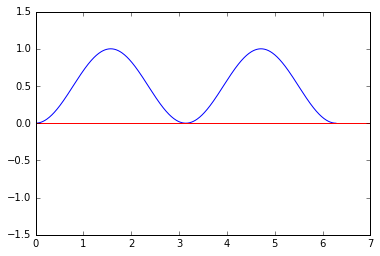

The integral is 3.14159265
1 2


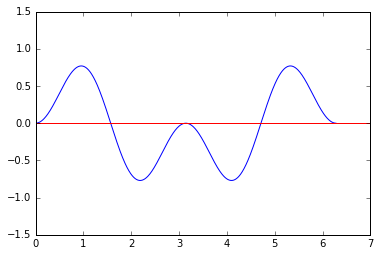

The integral is 0.0
1 3


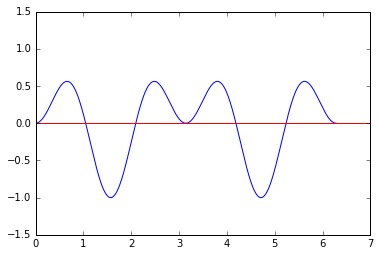

The integral is 0.0
2 1


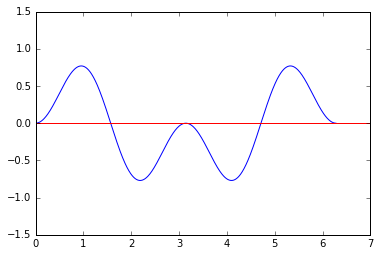

The integral is 0.0
2 2


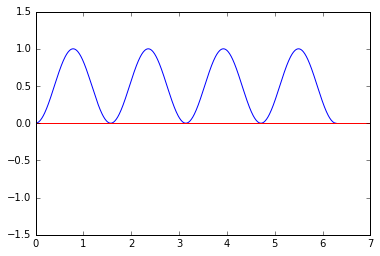

The integral is 3.14159265
2 3


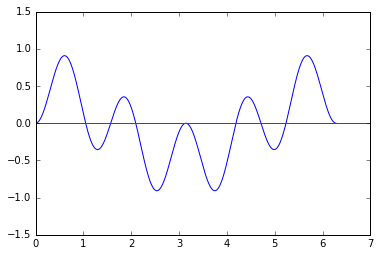

The integral is 0.0
3 1


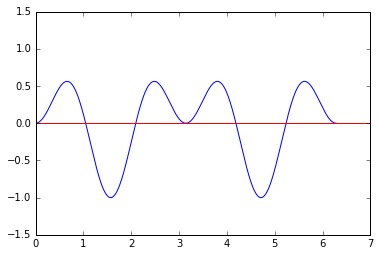

The integral is 0.0
3 2


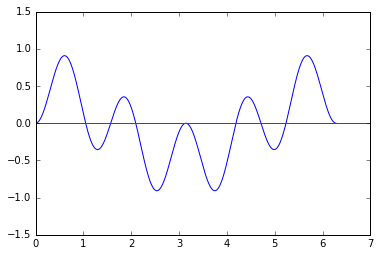

The integral is 0.0
3 3


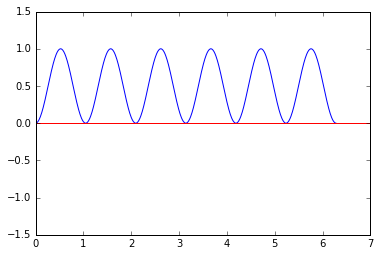

The integral is 3.14159265


In [4]:
for m in range(1,4):
    for n in range(1,4):
        fx = lambda x: np.sin(m*x)*np.sin(n*x)
        print m,n
        my_integral(fx, 0, np.pi*2)

Note that only when m and n are not equal, they integrate to zero (this means that the functions are ORTHOGONAL!!!).  When they are equal, they integrate to pi.

1 1


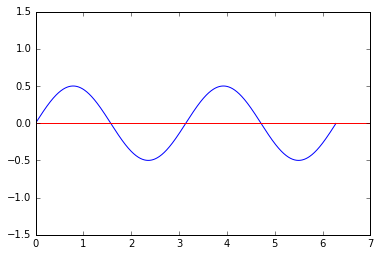

The integral is -0.0
1 2


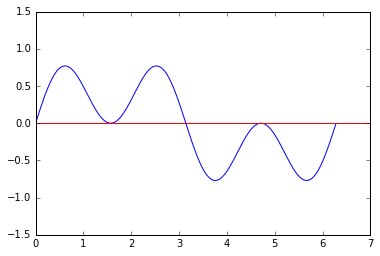

The integral is 0.0
1 3


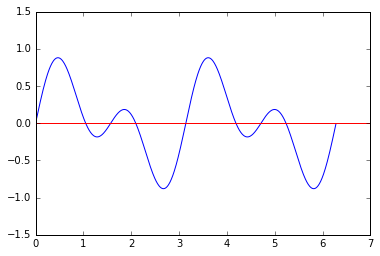

The integral is -0.0
2 1


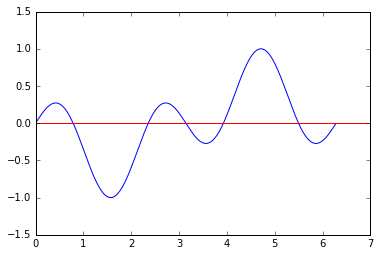

The integral is 0.0
2 2


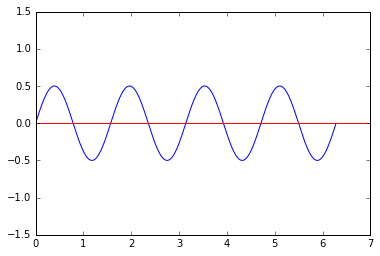

The integral is -0.0
2 3


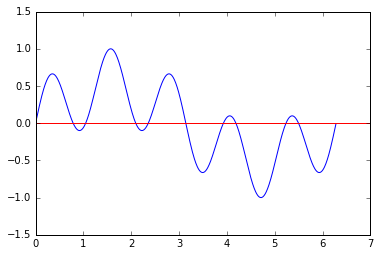

The integral is -0.0
3 1


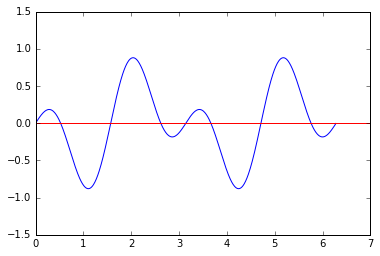

The integral is -0.0
3 2


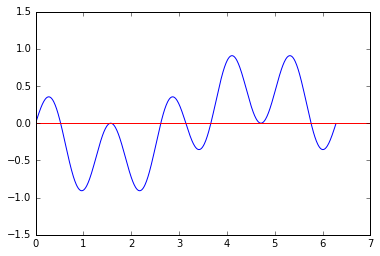

The integral is -0.0
3 3


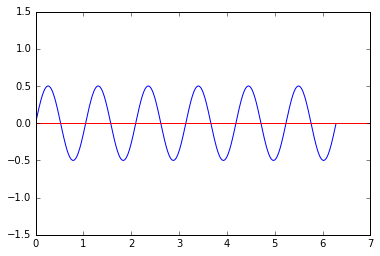

The integral is 0.0


In [5]:
for m in range(1,4):
    for n in range(1,4):
        fx = lambda x: np.cos(m*x)*np.sin(n*x)
        print m,n
        my_integral(fx, 0, np.pi*2)

Note that cosine * sine always integrates to zero. (this means that the functions are ORTHOGONAL!!!)

1 1


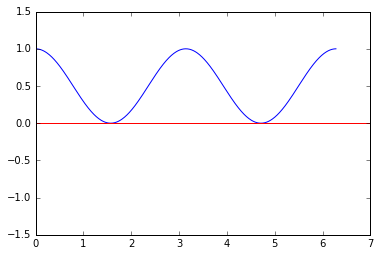

The integral is 3.14159265
1 2


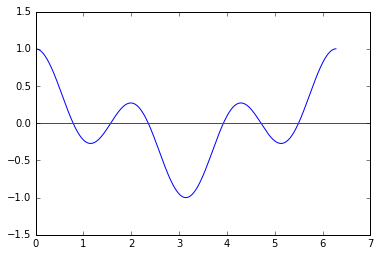

The integral is -0.0
1 3


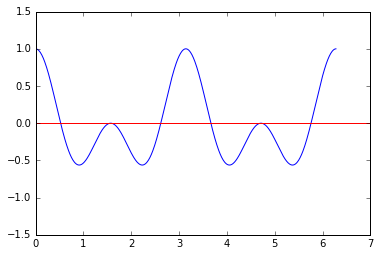

The integral is 0.0
2 1


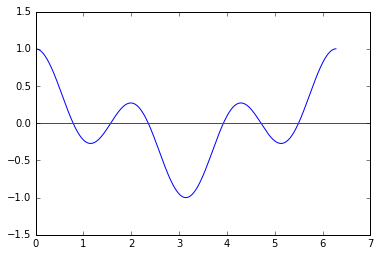

The integral is -0.0
2 2


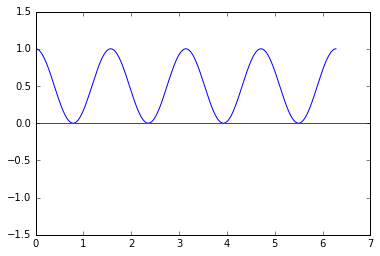

The integral is 3.14159265
2 3


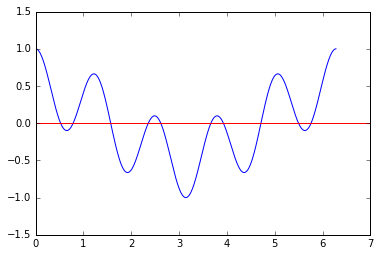

The integral is -0.0
3 1


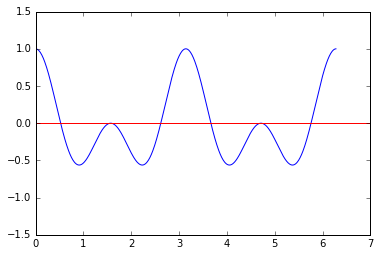

The integral is 0.0
3 2


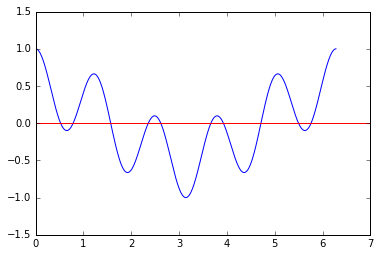

The integral is -0.0
3 3


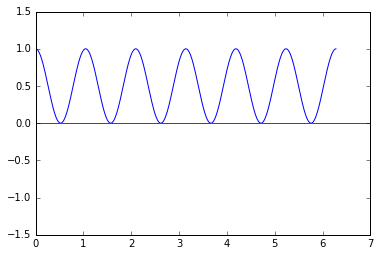

The integral is 3.14159265


In [6]:
for m in range(1,4):
    for n in range(1,4):
        fx = lambda x: np.cos(m*x)*np.cos(n*x)
        print m,n
        my_integral(fx, 0, np.pi*2)

Note that only when m and n are not equal, they integrate to zero (this means that the functions are ORTHOGONAL!!!).  When they are equal, they integrate to pi.

### Lets tie this back to projections...

In [7]:
t = np.arange(0, 2*np.pi, np.pi/10000.)
fx = lambda x: np.cos(2*x)
#print sum([val*val for val in fx(t)])
#print np.linalg.norm(fx(t))
#print np.linalg.norm(fx(t))/np.sqrt(len(t)/2)
print sum([val*val for val in fx(t)])*(2*np.pi/len(t))

3.14159265359


<h3>Given a signal f(t), how much of the cosine wave exists in the signal?</h3>
<img src="discrete.JPG" style="height:800px">
In this case, the answer is zero!  
<b>In the discrete sense, this is VERY similar to the PCA analysis where we project an f(t) onto an eigenvector to determine the coefficient!!! </b><br>
Note that pi is the normalizing term. 
<h3>Why does the fourier series work? </h3>
Because all of the terms are orthoganol, as we showed above!

<img src="fft.png">
Lets try doing the above math on a discrete version of the sine waves, from zero to 2pi.

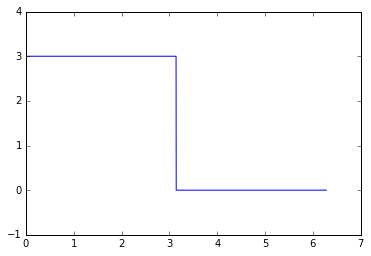

In [8]:
t = np.arange(0, 2*np.pi, np.pi/1000.)
y = [3*(1-round(num/(2.*np.pi))) for num in t]
plt.plot(t,y)
plt.ylim(-1,4)
plt.show()

In [9]:
sum(y)/(len(t)) #first coef

1.5

In [10]:
a0 = np.dot(y,[1 for i in t])/len(t)
a0 = sum(y)/len(t)
cos_dict = {}
sin_dict = {}
for i in range(1,1000):
    cos_dict[i] = np.dot(y,np.cos(i*t))/len(t)
for i in range(1,1000):
    sin_dict[i] = np.dot(y,np.sin(i*t))/len(t)

print 'sine'
print sin_dict
print ' '
print 'cosine'
print cos_dict

sine
{1: 0.95492887315307939, 2: -2.9594382500164328e-18, 3: 0.31830752998581224, 4: -1.0859368959614812e-17, 5: 0.19098200470330823, 6: -5.3290705182007515e-18, 7: 0.13641302481873857, 8: 9.5062846483529036e-18, 9: 0.10609622671694298, 10: -1.5640266859406893e-17, 11: 0.086803147589275903, 12: -1.3655743202889425e-17, 13: 0.07344591712090269, 14: 1.2101430968414206e-17, 15: 0.06365019582825833, 16: 2.1233015345956118e-18, 17: 0.056158980452417899, 18: 6.3005156647477634e-17, 19: 0.05024453226191683, 20: 6.4115379672102792e-17, 21: 0.045456346325388593, 22: 1.4405143744511407e-17, 23: 0.041500615076738745, 24: 1.0297318553398327e-17, 25: 0.038177549369035592, 26: 4.6906922790412867e-18, 27: 0.035346556837782608, 28: 2.2370993946196906e-17, 29: 0.032905829217319493, 30: -3.649858193455202e-17, 31: 0.030779831341197258, 32: 5.4956039718945251e-18, 33: 0.028911339596961693, 34: 5.2180482157382354e-17, 35: 0.027256210053583176, 36: -1.3877787807814458e-18, 37: 0.025779843412422131, 38: -4.

In [11]:
def plot_fourier_transform(max_number_of_periods):
    big_list = []
    big_list.append(np.array([a0 for i in t]))
    for i in range(1,max_number_of_periods):
        big_list.append(cos_dict[i]*np.cos(i*t))
        big_list.append(sin_dict[i]*np.sin(i*t))
    my_array = np.array(big_list)
    plt.plot(my_array.sum(axis=0))

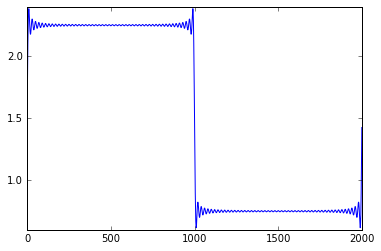

In [12]:
plot_fourier_transform(100)

Here we can see that as we increase the max_number_of_periods we get very close to our original function.

## Fast Fourier Transform
This transform can be very calculation intensive on large datasets, O(N^2), but the FFT allows for O(N log N).

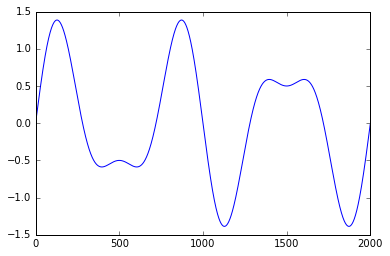

In [146]:
import scipy.fftpack
fake_signal = np.sin(3*t)+0.5*np.sin(5*t)
fake_signal_fft = np.fft.fft(fake_signal)
plt.plot(fake_signal)
plt.show()

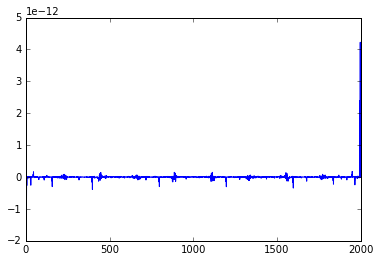

In [147]:
plt.plot(fake_signal_fft)
plt.show()

(0, 10)

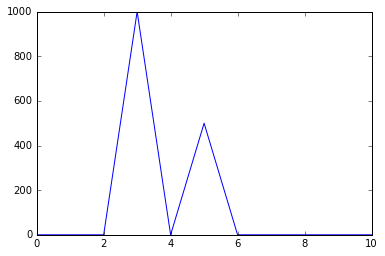

In [148]:
N= len(fake_signal_fft)/2+1
plt.plot(abs(fake_signal_fft)[:N])
plt.xlim(0,10)

(0, 10)

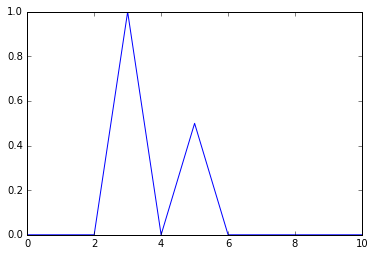

In [154]:
#can normalize by multiplying by N, where N is the 2 divided by the length of signal
N= len(fake_signal_fft)/2+1
plt.plot(abs(fake_signal_fft)[:N]/N)
plt.xlim(0,10)

In [150]:
for i,val in enumerate(abs(fake_signal_fft)[:N]):
    print i, round(val,3)

0 0.0
1 0.0
2 0.0
3 1000.0
4 0.0
5 500.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 0.0
48 0.0
49 0.0
50 0.0
51 0.0
52 0.0
53 0.0
54 0.0
55 0.0
56 0.0
57 0.0
58 0.0
59 0.0
60 0.0
61 0.0
62 0.0
63 0.0
64 0.0
65 0.0
66 0.0
67 0.0
68 0.0
69 0.0
70 0.0
71 0.0
72 0.0
73 0.0
74 0.0
75 0.0
76 0.0
77 0.0
78 0.0
79 0.0
80 0.0
81 0.0
82 0.0
83 0.0
84 0.0
85 0.0
86 0.0
87 0.0
88 0.0
89 0.0
90 0.0
91 0.0
92 0.0
93 0.0
94 0.0
95 0.0
96 0.0
97 0.0
98 0.0
99 0.0
100 0.0
101 0.0
102 0.0
103 0.0
104 0.0
105 0.0
106 0.0
107 0.0
108 0.0
109 0.0
110 0.0
111 0.0
112 0.0
113 0.0
114 0.0
115 0.0
116 0.0
117 0.0
118 0.0
119 0.0
120 0.0
121 0.0
122 0.0
123 0.0
124 0.0
125 0.0
126 0.0
127 0.0
128 0.0
129 0.0
130 0.0
131 0.0
132 0.0
133 0.0
134 0.0
135 0.0
136 0.0
137 0.0
1

3 and 5 are the frequencies of interest, as expected

### Reconstruction

2000


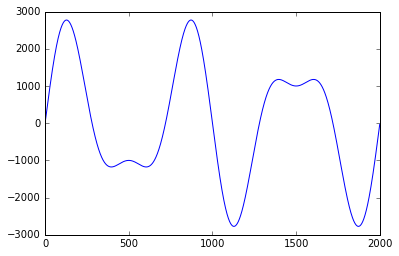

In [151]:
def recon(Y,x, N):
    total = 0
    for ctr in range(len(Y)):
        total += Y[ctr] * (np.cos(x*ctr*2*np.pi/N) + 1j*np.sin(x*ctr*2*np.pi/N))
    return scipy.real(total)


Y= np.fft.fft(fake_signal)
N=len(Y)
print N

xs = range(N)
plt.plot(xs, [recon(Y, x, N) for x in xs])
plt.show()

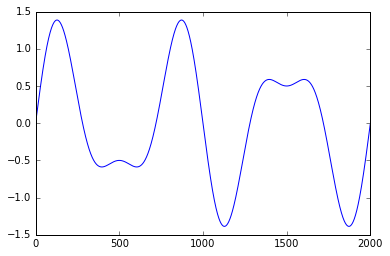

In [153]:
plt.plot(fake_signal)
plt.show()

## Apply to some traffic data!

In [157]:
df = pd.read_csv('../data/I15S_data.csv')

In [158]:
idx1 = df['Station'] == 1108148
df = df.ix[idx1,:]

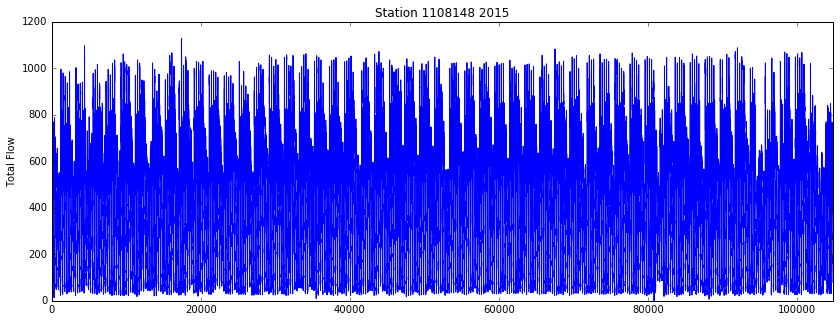

In [159]:
plt.figure(figsize=(14,5))
df['TotalFlow'].plot()
plt.title('Station 1108148 2015')
plt.ylabel('Total Flow')
plt.show()

In [160]:
Y = np.fft.fft(df.TotalFlow.values)
N = len(Y)/2+1
fa = 1.0/(5.0*60.0) # every 5 minutes
print('fa=%.4fHz (Frequency)' % fa)

fa=0.0033Hz (Frequency)


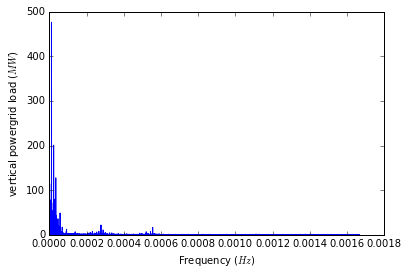

In [164]:
X = np.linspace(0, fa/2, N, endpoint=True)
plt.plot(X, 2.0*np.abs(Y[:N])/N)
plt.ylim(0,500)
plt.xlabel('Frequency ($Hz$)')
plt.ylabel('vertical powergrid load ($MW$)')

In [162]:
Xp = 1.0/X # in seconds
Xph= Xp/(60.0*60.0) # in hours

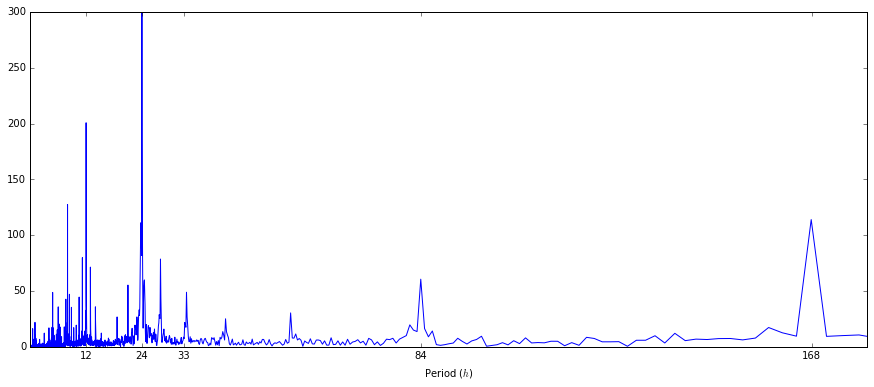

In [165]:
plt.figure(figsize=(15,6))
plt.plot(Xph, 2.0*np.abs(Y[:N])/N)
plt.xticks([12, 24, 33, 84, 168])
plt.xlim(0, 180)
plt.ylim(0, 300)
plt.xlabel('Period ($h$)')
plt.show()

In [171]:
fft_df = pd.DataFrame({'hours':Xph, 'coef':2.0*np.abs(Y[:N])/N}).sort_values('coef', ascending=False)
fft_df.head(10)

,coef,hours
0,1739.229659,inf
364,476.109320,23.989927
728,200.747395,11.994963
363,188.585703,24.056015
1091,127.528180,8.003972
52,114.007887,167.929487
367,111.247807,23.793824
727,108.398759,12.011463
368,103.928917,23.729167
366,102.729654,23.858834


Top Coefficients are 24 hours, 12 hours, 8 hours, 168 hours (one week)

In [183]:
fft_df['nearest_hour']=fft_df['hours'].apply(lambda x: round(x,0))

In [185]:
# not sure if we should use sum or avg here.... avg seems interesting
fft_df[['nearest_hour','coef']].groupby('nearest_hour').mean().reset_index().sort_values('coef', ascending=False)

,nearest_hour,coef
187,inf,1739.229659
135,168.000000,114.007887
24,24.000000,103.139182
84,84.000000,60.579887
186,8732.000000,35.669727
28,28.000000,25.602442
25,25.000000,20.490816
23,23.000000,19.375384
34,34.000000,17.367500
82,82.000000,17.327968


1. 168 = week
2. 24 = day
3. 84 = half week?